In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
test_df=pd.read_csv('C:/Users/DAT/Desktop/test.csv',index_col='PassengerId')

train_df=pd.read_csv('C:/Users/DAT/Desktop/train.csv',index_col='PassengerId')


In [ ]:
train_df

1.Cleaning data

Change data type feature to category

In [ ]:
train_df['Survived']=train_df['Survived'].astype('category')

features=['Pclass','Sex','SibSp','Parch','Embarked']
def convert_cat(df,feature):
    for feature in features:
        df[feature]=df[feature].astype('category')

convert_cat(test_df,features)
convert_cat(train_df,features)


In [ ]:
train_df.info()

In [ ]:
test_df.info()

Distribution of numerical feature values across the sample

In [ ]:
train_df.describe()

Distribution Of Categorical feature

In [ ]:
train_df.describe(include=['category'])

2.Exploratory Data Analysis

Target variable: Survived


In [ ]:
train_df['Survived'].value_counts().to_frame()

In [ ]:
train_df['Survived'].value_counts(normalize= True).to_frame()

Lady First

In [ ]:
sns.countplot(data=train_df,x='Sex',hue='Survived')



In [ ]:
features=['Sex','Pclass','Parch','Embarked','SibSp']

n_rows=2
n_cols=3

fig, ax=plt.subplots(n_rows,n_cols,figsize=((n_rows*5,n_cols*2)))
for r in range(n_rows):
    for c in range (n_cols):    
        i=r*n_cols+c
        if i < len(features):
            ax_i=ax[r,c]
            sns.countplot(data=train_df,x=features[i],hue='Survived',ax=ax_i)
            ax_i.set_title(f'Figure {i+1}:Survived Rate vs {features[i]}')
            ax_i.legend(title='',loc='upper right',labels=['Not Survived','Survived'])
plt.tight_layout()
ax.flat[-1].set_visible(False)
            





In [ ]:
train_df

3.EDA for numerical feature


.Numerical feature:(continuous) Age, Fare

In [ ]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True)


In [ ]:
cate_fare=['Regular','Standard','Expensive','Luxury']
fare=pd.qcut(train_df['Fare'],4,labels=cate_fare)
sns.countplot(data=train_df,x=fare,hue='Survived')

4. Feature Engineering and Data Wrangling

4.1 Feature Engieering

In [ ]:
import re
def extract_title(name):
    p= re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Name'].apply(lambda name: extract_title(name))

In [63]:
train_df['title']=train_df['Name'].apply(lambda name: extract_title(name))
train_df['title'].value_counts()
test_df['title']=test_df['Name'].apply(lambda name: extract_title(name))

In [65]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title== 'Ms':
        return 'Miss'
    else :
        return 'Other'
train_df['title']=train_df['title'].apply(lambda title:group_title(title))
test_df['title']=test_df['title'].apply(lambda title:group_title(title))


In [58]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<AxesSubplot: xlabel='title', ylabel='count'>

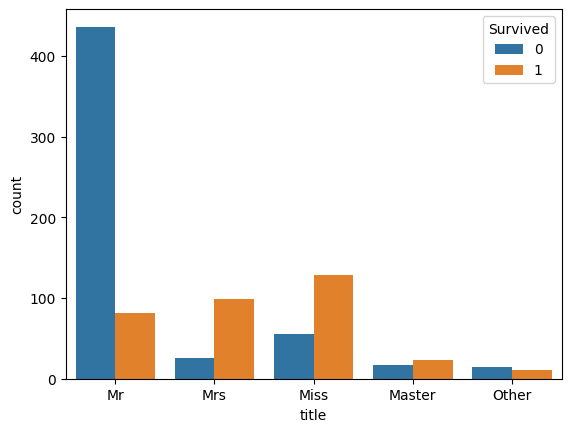

In [61]:
sns.countplot(data =train_df,x='title',hue='Survived')

<AxesSubplot: xlabel='title', ylabel='Count'>

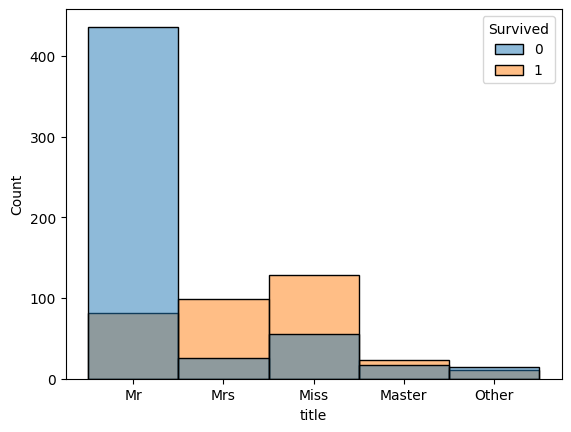

In [62]:
sns.histplot(data =train_df,x='title',hue='Survived',bins=40)